In [193]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar10-python/cifar-10-python.tar.gz
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_1
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_2
/kaggle/input/cifar10-python/cifar-10-batches-py/batches.meta
/kaggle/input/cifar10-python/cifar-10-batches-py/test_batch
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_3
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_5
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_4
/kaggle/input/cifar10-python/cifar-10-batches-py/readme.html


In [194]:
import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [195]:
print("Input image shape:", x_train.shape[1:])

Input image shape: (32, 32, 3)


In [196]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train.reshape(-1, 32 * 32 * 3)).reshape(-1, 32, 32, 3)
x_val = scaler.transform(x_val.reshape(-1, 32 * 32 * 3)).reshape(-1, 32, 32, 3)
x_test = scaler.transform(x_test.reshape(-1, 32 * 32 * 3)).reshape(-1, 32, 32, 3)

In [197]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
def create_model():
    m1=3
    m2=3
    x1=64
    x2=32
    d=0.2
    x3=4096

    model = Sequential()

    model.add(Conv2D(filters=x1, kernel_size=(m1, m1), activation='relu', input_shape=(32, 32, 3),padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(filters=x2, kernel_size=(m2, m2), activation='relu',padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu',padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    model.add(Flatten())

    model.add(Dense(x3, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(10, activation='softmax'))
    return model



In [198]:
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model=create_model();
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
epochs = 20
checkpoint = ModelCheckpoint("best_model.h5",  monitor='val_loss', save_best_only=True, mode='min' )

In [ ]:
history = model.fit(x_train, y_train, epochs=epochs,validation_data=(x_val, y_val),callbacks=[checkpoint])

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [199]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]
epochs = 20
history_dict = {}

for lr in learning_rates:
    model=create_model()
    learning_rate =lr
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    checkpoint = ModelCheckpoint(f"best_model_lr_{lr}.h5", monitor='val_loss', save_best_only=True, mode='min')
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val),callbacks=[checkpoint])
    history_dict[lr] = history



Epoch 1/20


2023-12-03 13:05:00.903921: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_45/dropout_120/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1247/1250 [============================>.] - ETA: 0s - loss: 1.6637 - accuracy: 0.4001

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 8s 5ms/step - loss: 1.6628 - accuracy: 0.4006 - val_loss: 1.4093 - val_accuracy: 0.5042
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3758 - accuracy: 0.5111 - val_loss: 1.2544 - val_accuracy: 0.5726
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2503 - accuracy: 0.5552 - val_loss: 1.1383 - val_accuracy: 0.6043
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1555 - accuracy: 0.5925 - val_loss: 1.0470 - val_accuracy: 0.6346
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0809 - accuracy: 0.6180 - val_loss: 1.0027 - val_accuracy: 0.6553
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0135 - accuracy: 0.6422 - val_loss: 0.9470 - val_accuracy: 0.6692
Epoch 7/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9632 - accuracy: 0.6618 - val_loss: 0.8819 - val_accuracy: 0.6969
Epo

2023-12-03 13:07:06.518390: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_46/dropout_124/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1250/1250 [==============================] - 8s 5ms/step - loss: 1.6255 - accuracy: 0.4105 - val_loss: 1.3079 - val_accuracy: 0.5418
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3408 - accuracy: 0.5204 - val_loss: 1.1529 - val_accuracy: 0.5882
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2414 - accuracy: 0.5592 - val_loss: 1.0546 - val_accuracy: 0.6431
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1829 - accuracy: 0.5882 - val_loss: 0.9827 - val_accuracy: 0.6606
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1318 - accuracy: 0.6068 - val_loss: 1.0062 - val_accuracy: 0.6542
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1071 - accuracy: 0.6180 - val_loss: 0.9731 - val_accuracy: 0.6645
Epoch 7/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0908 - accuracy: 0.6220 - val_loss: 0.9984 - val_accuracy: 0.6671
Epo

2023-12-03 13:09:05.946355: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_47/dropout_128/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1250/1250 [==============================] - 8s 5ms/step - loss: 2.3861 - accuracy: 0.1001 - val_loss: 2.3042 - val_accuracy: 0.0973
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 2.3054 - accuracy: 0.0983 - val_loss: 2.3041 - val_accuracy: 0.0979
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 2.3076 - accuracy: 0.0998 - val_loss: 2.3035 - val_accuracy: 0.1023
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 2.3191 - accuracy: 0.0999 - val_loss: 2.3039 - val_accuracy: 0.0973
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 2.3040 - accuracy: 0.0971 - val_loss: 2.3042 - val_accuracy: 0.0933
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 2.3412 - accuracy: 0.1027 - val_loss: 2.3040 - val_accuracy: 0.1030
Epoch 7/20
1250/1250 [==============================] - 6s 5ms/step - loss: 2.3273 - accuracy: 0.1012 - val_loss: 2.3038 - val_accuracy: 0.1017
Epo

2023-12-03 13:11:05.578150: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_48/dropout_132/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1250/1250 [==============================] - 8s 5ms/step - loss: 520.1473 - accuracy: 0.1004 - val_loss: 2.3120 - val_accuracy: 0.0979
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 3.7477 - accuracy: 0.0977 - val_loss: 2.3103 - val_accuracy: 0.0996
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 2.3151 - accuracy: 0.1010 - val_loss: 2.3142 - val_accuracy: 0.1040
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 9.9160 - accuracy: 0.0996 - val_loss: 2.3100 - val_accuracy: 0.1030
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 2.3141 - accuracy: 0.0987 - val_loss: 2.3087 - val_accuracy: 0.0933
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 2.3159 - accuracy: 0.0999 - val_loss: 2.3179 - val_accuracy: 0.0973
Epoch 7/20
1250/1250 [==============================] - 6s 5ms/step - loss: 2.3164 - accuracy: 0.0981 - val_loss: 2.3181 - val_accuracy: 0.0979
E

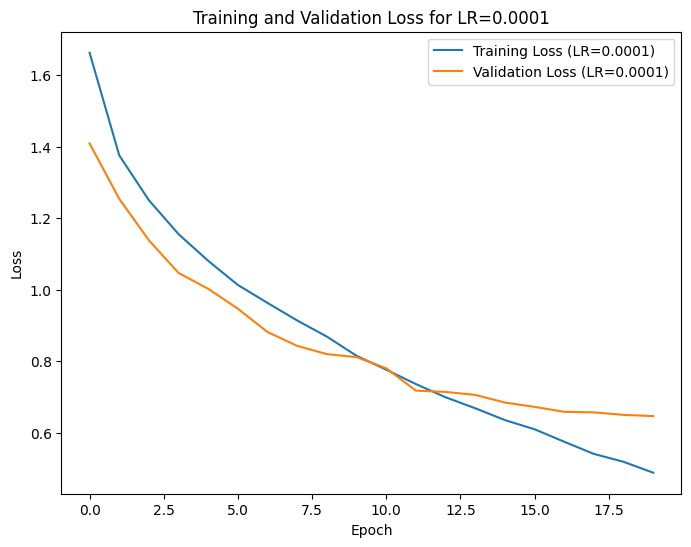

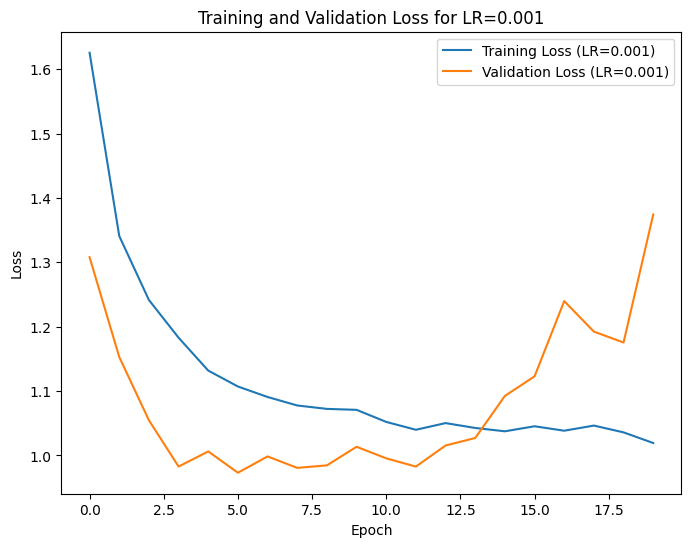

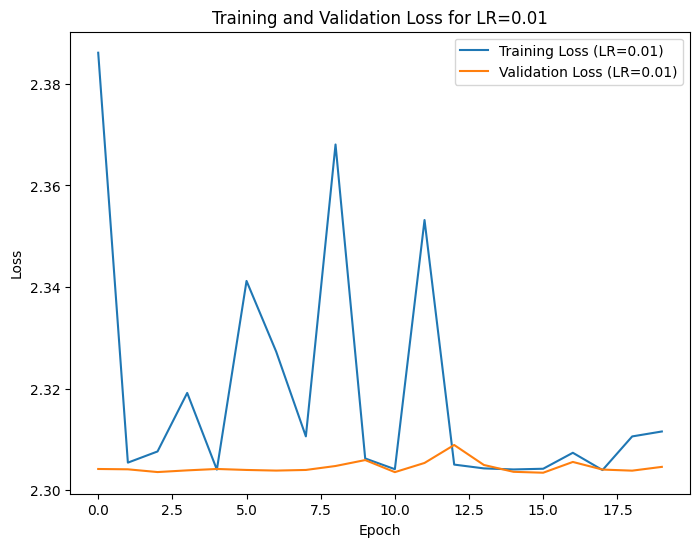

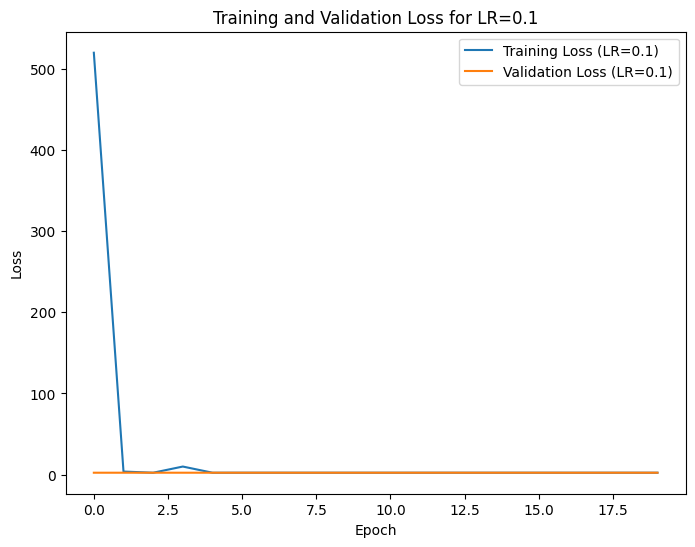

In [200]:
for i, (lr, history) in enumerate(history_dict.items(), 1):
    plt.figure(figsize=(8, 6))

    plt.plot(history.history['loss'], label=f'Training Loss (LR={lr})')
    plt.plot(history.history['val_loss'], label=f'Validation Loss (LR={lr})')

    plt.title(f'Training and Validation Loss for LR={lr}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [ ]:
print(y_train[1])

In [201]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score


In [202]:
model_path = "/kaggle/working/best_model_lr_0.0001.h5"
model = load_model(model_path)

In [203]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)


313/313 [==============================] - 1s 2ms/step


In [204]:
# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Test Accuracy: {test_accuracy}')

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix:')
print(conf_matrix)

# precision and recall
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')


Test Accuracy: 0.7744
Confusion Matrix:
[[847   9  24  14  13   4  12   6  47  24]
 [ 19 853   4   6   3   6  12   1  27  69]
 [ 69   2 659  42  87  60  51  15   7   8]
 [ 24   5  58 554  79 176  64  17  11  12]
 [ 15   1  58  39 784  24  38  31   6   4]
 [ 16   2  36 141  50 690  24  29   5   7]
 [  7   1  27  35  35  18 867   2   5   3]
 [ 12   0  27  37  64  64   9 777   2   8]
 [ 58  19   7  10   9   7   3   1 865  21]
 [ 33  55   4  12   4   5   6  11  22 848]]
Precision: 0.7755478376364449
Recall: 0.7744


In [206]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.applications import ResNet50
from keras.models import Sequential

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a fine-tuned model
def transfer_learning():
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    return model

In [219]:
learning_rates = [0.0001]
epochs = 20
history1_dict = {}

for lr in learning_rates:
    model=transfer_learning()
    learning_rate =lr
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    checkpoint = ModelCheckpoint(f"best_model_lr_transfer{lr}.h5", monitor='val_loss', save_best_only=True, mode='min')
    history1 = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val),callbacks=[checkpoint])
    history1_dict[lr] = history1

Epoch 1/20
1250/1250 [==============================] - 21s 14ms/step - loss: 1.8031 - accuracy: 0.3570 - val_loss: 1.6314 - val_accuracy: 0.4154
Epoch 2/20
1250/1250 [==============================] - 16s 13ms/step - loss: 1.6171 - accuracy: 0.4279 - val_loss: 1.5650 - val_accuracy: 0.4524
Epoch 3/20
1250/1250 [==============================] - 16s 13ms/step - loss: 1.5572 - accuracy: 0.4493 - val_loss: 1.5616 - val_accuracy: 0.4591
Epoch 4/20
1250/1250 [==============================] - 16s 13ms/step - loss: 1.5157 - accuracy: 0.4654 - val_loss: 1.5232 - val_accuracy: 0.4629
Epoch 5/20
1250/1250 [==============================] - 16s 13ms/step - loss: 1.4853 - accuracy: 0.4764 - val_loss: 1.5227 - val_accuracy: 0.4615
Epoch 6/20
1250/1250 [==============================] - 16s 13ms/step - loss: 1.4524 - accuracy: 0.4895 - val_loss: 1.4949 - val_accuracy: 0.4771
Epoch 7/20
1250/1250 [==============================] - 16s 13ms/step - loss: 1.4264 - accuracy: 0.4965 - val_loss: 1.5446 -

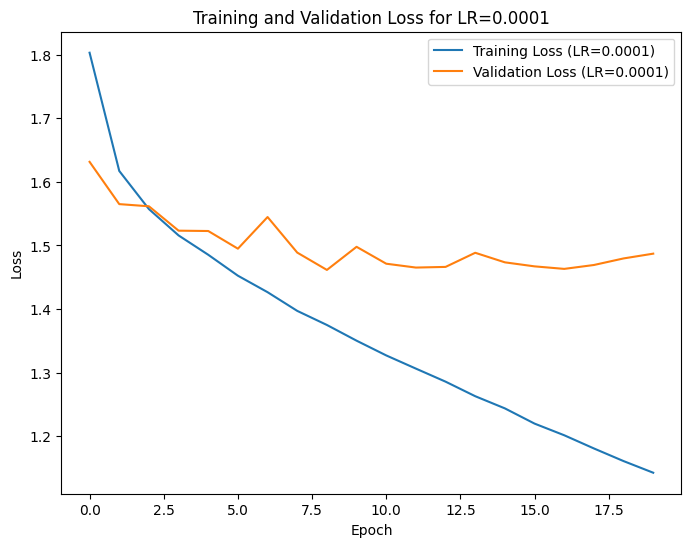

In [220]:
for i, (lr, history1) in enumerate(history1_dict.items(), 1):
    plt.figure(figsize=(8, 6))

    plt.plot(history1.history['loss'], label=f'Training Loss (LR={lr})')
    plt.plot(history1.history['val_loss'], label=f'Validation Loss (LR={lr})')

    plt.title(f'Training and Validation Loss for LR={lr}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [221]:
model_path = "/kaggle/input/moel-best/best_model_lr_0.0001.h5"
model = load_model(model_path)

In [222]:
y_pred_fine_tuned = model.predict(x_test)
y_pred_classes_fine_tuned = np.argmax(y_pred_fine_tuned, axis=1)

313/313 [==============================] - 4s 9ms/step


In [224]:
# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred_classes_fine_tuned)
print(f'Test Accuracy: {test_accuracy}')

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes_fine_tuned)
print('Confusion Matrix:')
print(conf_matrix)

# precision and recall
precision = precision_score(y_test, y_pred_classes_fine_tuned, average='weighted')
recall = recall_score(y_test, y_pred_classes_fine_tuned, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')

Test Accuracy: 0.4972
Confusion Matrix:
[[569  44  85  20  49  13  30  33 130  27]
 [ 41 563  16  30  28  21  46  35  61 159]
 [100  41 343  87 134  89  87  54  44  21]
 [ 32  50  77 290  92 161 133  91  16  58]
 [ 38  37  81  69 433  44 124 127  25  22]
 [ 11  39  55 163  64 456  73  88  17  34]
 [ 20  45  56  65  82  50 615  31  13  23]
 [ 26  35  37  56  75  75  28 577  18  73]
 [127  86  24  16  26  16  20  18 600  67]
 [ 43 158  13  21  15  30  39  76  79 526]]
Precision: 0.49242005073788353
Recall: 0.4972
